In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [7]:
file_path = r'C:\Users\aditi\Desktop\Data Analytics_Career Foundry\Data Analytics_Immersion\Project 6\Final_dataset.xlsx'

In [10]:
df = pd.read_excel(file_path)

In [14]:
df.head()

iso_code continent     location       date  Month  Year  total_cases  \
0      AFG      Asia  Afghanistan 2024-05-05      5  2024       235214   
1      AFG      Asia  Afghanistan 2024-05-06      5  2024       235214   
2      AFG      Asia  Afghanistan 2024-05-07      5  2024       235214   
3      AFG      Asia  Afghanistan 2024-05-08      5  2024       235214   
4      AFG      Asia  Afghanistan 2024-05-09      5  2024       235214   

   total_deaths  reproduction_rate  icu_patients  ...  people_vaccinated  \
0          7998                0.0             0  ...                  0   
1          7998                0.0             0  ...                  0   
2          7998                0.0             0  ...                  0   
3          7998                0.0             0  ...                  0   
4          7998                0.0             0  ...                  0   

   people_fully_vaccinated  aged_65_older  gdp_per_capita (in USD)  \
0                        0          2.581                 1803.987   
1                        0          2.581                 1803.987   
2                        0          2.581                 1803.987   
3                        0          2.581                 1803.987   
4                        0          2.581                 1803.987   

   cardiovasc_death_rate (per 100,000)  diabetes_prevalence  female_smokers  \
0                              597.029                 9.59             0.0   
1                              597.029                 9.59             0.0   
2                              597.029                 9.59             0.0   
3                              597.029                 9.59             0.0   
4                              597.029                 9.59             0.0   

   male_smokers  life_expectancy  population  
0           0.0            64.83    41128772  
1           0.0            64.83    41128772  
2           0.0            64.83    41128772  
3           0.0            64.83    41128772  
4           0.0            64.83    41128772  

[5 rows x 22 columns]

In [21]:
df_subset=df[['continent', 'location', 'date', 'Month', 'Year', 'total_cases']]

In [23]:
df_subset.head()

continent     location       date  Month  Year  total_cases
0      Asia  Afghanistan 2024-05-05      5  2024       235214
1      Asia  Afghanistan 2024-05-06      5  2024       235214
2      Asia  Afghanistan 2024-05-07      5  2024       235214
3      Asia  Afghanistan 2024-05-08      5  2024       235214
4      Asia  Afghanistan 2024-05-09      5  2024       235214

In [26]:
df_subset.shape

(377239, 6)

In [124]:
df_subset = df_subset.rename(columns={'total_cases': 'value'})

In [126]:
df_subset['date'] = pd.to_datetime(df_subset['date'])
df_subset['value'] = pd.to_numeric(df_subset['value'])

In [128]:
df_final=df_subset[['date', 'value']]

In [130]:
df_final['date'] = pd.to_datetime(df_final['date'], errors='coerce')
df_final['value'] = pd.to_numeric(df_final['value'], errors='coerce')

In [132]:
df_final = df_final.drop_duplicates(subset=['date', 'value'])

In [134]:
df_final.shape

(346628, 2)

In [137]:
df_final.isnull().sum()

date     0
value    0
dtype: int64

In [140]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_final)

Error in callback <function _draw_all_if_interactive at 0x0000026086E09760> (for post_execute), with arguments args (),kwargs {}:


ValueError: Date ordinal -5171841.45 converts to -12191-12-24T13:12:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

ValueError: Date ordinal -5171841.45 converts to -12191-12-24T13:12:00.000000 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 1500x500 with 1 Axes>

In [142]:
print(df_final['date'].min(), df_final['date'].max())

2020-01-01 00:00:00 2024-07-11 00:00:00


In [144]:
df_final.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [152]:
# Set the "Date" column as the index

from datetime import datetime

df_final['datetime'] = pd.to_datetime(df_final['date']) # Create a datetime column from "Date.""
df_final = df_final.set_index('datetime') # Set the datetime as the index of the dataframe.
df_final.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_final.head()

value
datetime          
2024-05-05  235214
2024-05-06  235214
2024-05-07  235214
2024-05-08  235214
2024-05-09  235214

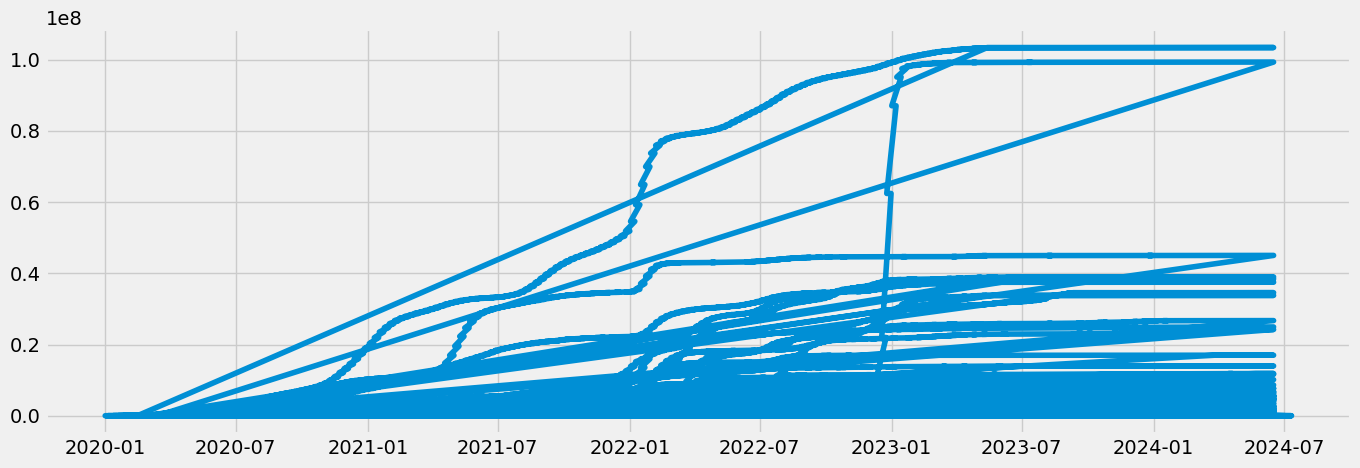

In [156]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_final)

In [163]:
df_final_subset = df_final.loc[(df_final.index >= '2020.12.31') & (df_final.index < '2023.01.01')]

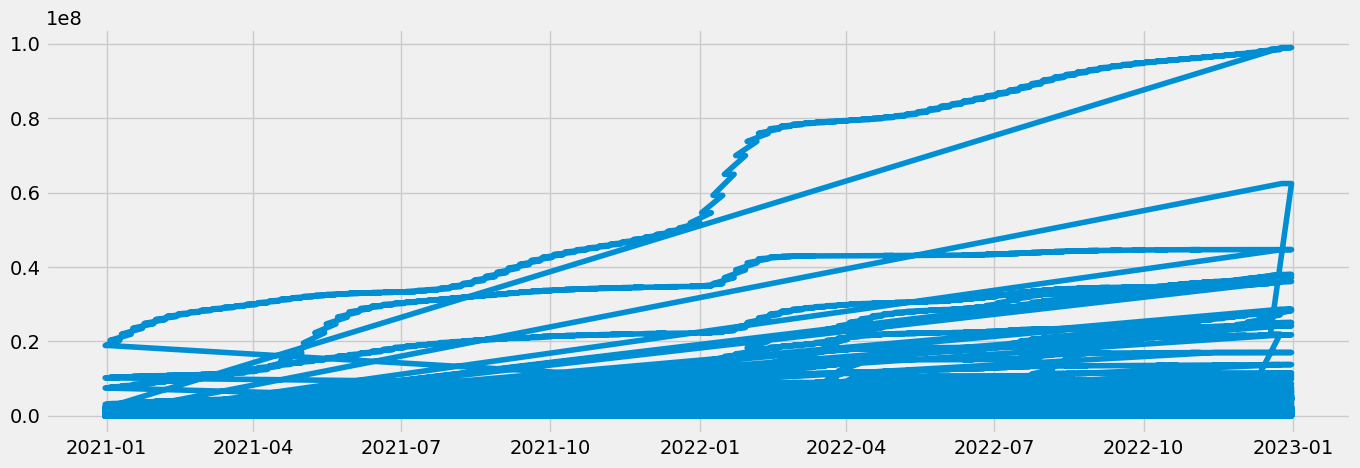

In [167]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_final_subset)

# Time-series analysis: decomposition

In [172]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_final_subset, model='additive')

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [176]:
df_final_subset = df_final_subset.asfreq('D')  # Set 'D' for daily data; adjust as needed

ValueError: cannot reindex on an axis with duplicate labels

In [178]:
duplicates = df_final_subset.index[df_final_subset.index.duplicated()]

In [180]:
print("Duplicate indices:", duplicates)

Duplicate indices: DatetimeIndex(['2022-12-25', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30', '2022-12-31', '2022-12-18',
               '2022-12-19', '2022-12-20',
               ...
               '2021-01-03', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08', '2021-01-09', '2020-12-31',
               '2021-01-01', '2021-01-02'],
              dtype='datetime64[ns]', name='datetime', length=163388, freq=None)


In [182]:
df_final_subset = df_final_subset[~df_final_subset.index.duplicated(keep='first')]

In [184]:
df_final_subset = df_final_subset.asfreq('D')  # Set 'D' for daily data; adjust as needed

In [186]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_final_subset, model='additive')

In [189]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

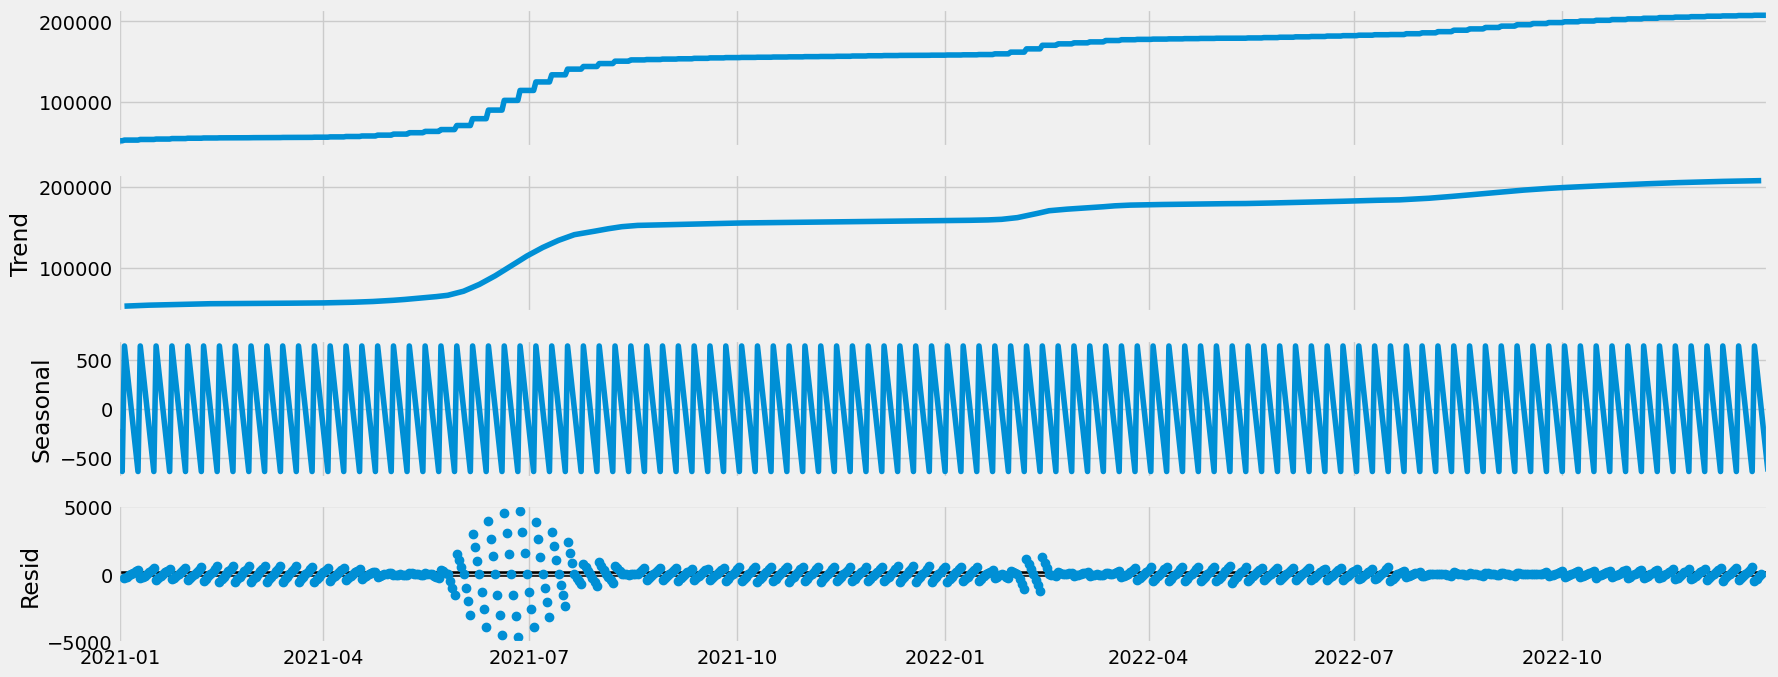

In [192]:
# Plot the separate components

decomposition.plot()
plt.show()

# Testing for stationarity

In [198]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_final_subset['value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.634059
p-value                          0.465367
Number of Lags Used             14.000000
Number of Observations Used    716.000000
Critical Value (1%)             -3.439516
Critical Value (5%)             -2.865585
Critical Value (10%)            -2.568924
dtype: float64


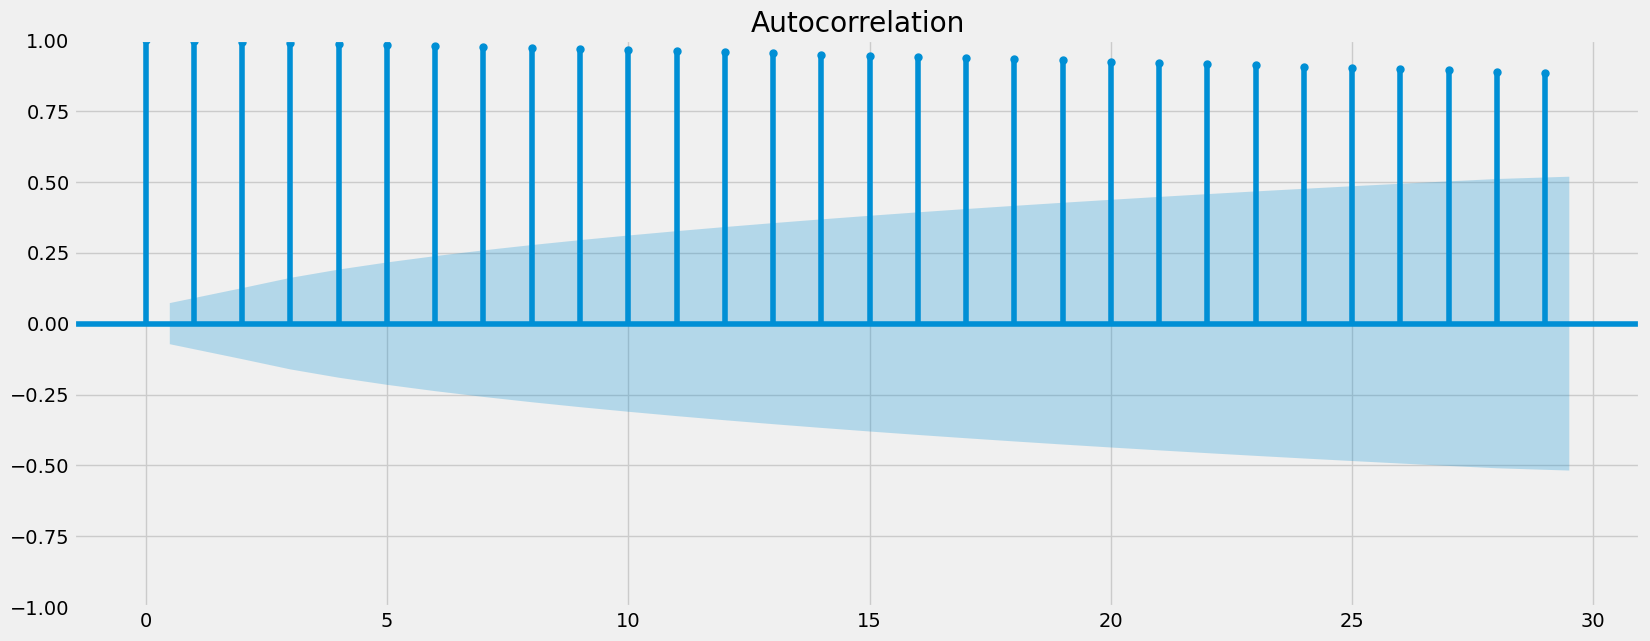

In [201]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_final_subset)
plt.show()

# Stationarizing the dataset

In [227]:
data_diff = df_final_subset - df_final_subset.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [230]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [233]:
data_diff.head()

value
datetime         
2021-01-01    0.0
2021-01-02    0.0
2021-01-03  861.0
2021-01-04    0.0
2021-01-05    0.0

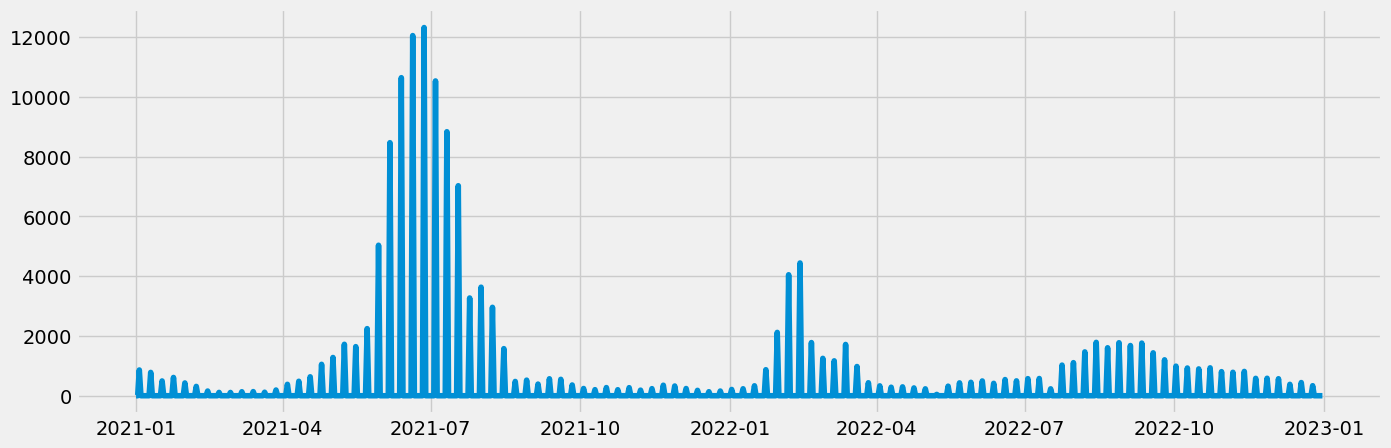

In [237]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [240]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -3.283214
p-value                          0.015646
Number of Lags Used             13.000000
Number of Observations Used    716.000000
Critical Value (1%)             -3.439516
Critical Value (5%)             -2.865585
Critical Value (10%)            -2.568924
dtype: float64


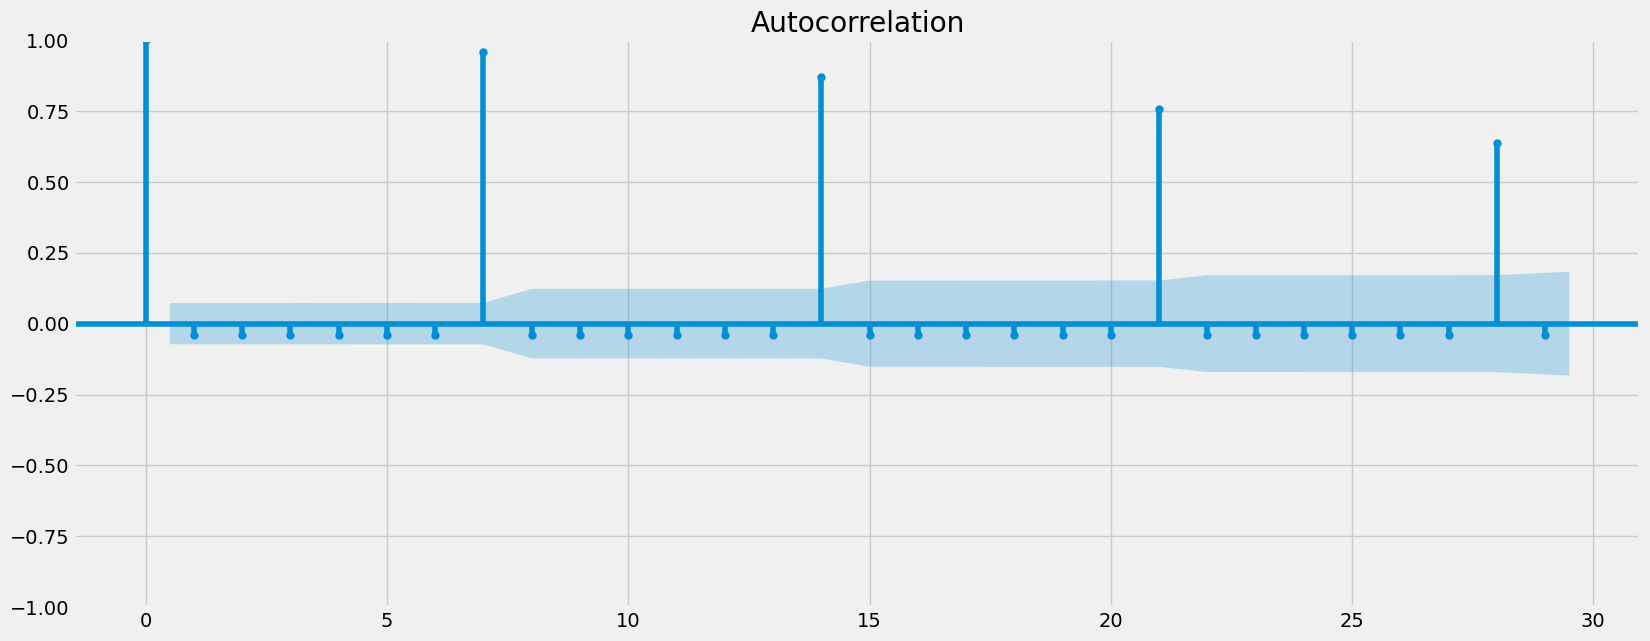

In [243]:
plot_acf(data_diff)
plt.show()

Before stationarizing my data had p-value=0.5. This is because my data has seasonality and is non-stationary. After stationarizaing the data p-value is below the 0.05 threshold (0.016), which means that the null hypothesis of the Dickey-Fuller test can be rejected. The rejection of the null hypothesis indicates that the time series is now stationary. Now this can be used for forecast.

# Tried fitting ARIMA model with help from ChatGpT

In [259]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

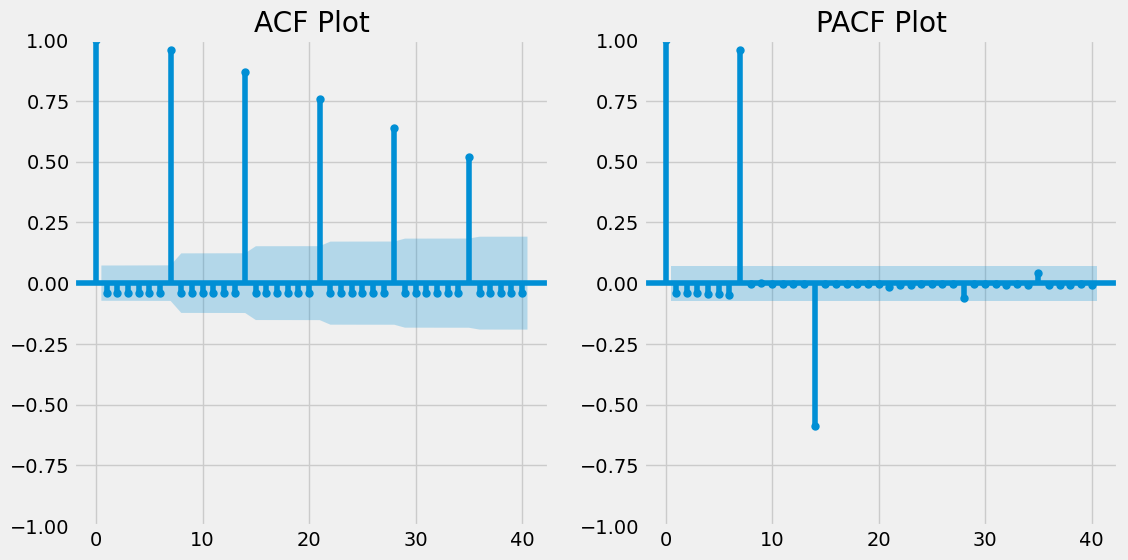

In [261]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(data_diff, lags=40, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(data_diff, lags=40, ax=plt.gca())
plt.title('PACF Plot')

plt.show()

In [273]:
model = ARIMA(data_diff['value'].dropna(), order=(0, 0, 0))  # Example order (p, d, q)
model_fit = model.fit()

In [275]:
model_fit.plot_diagnostics(figsize=(15, 8))
plt.show()

In [277]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  730
Model:                          ARIMA   Log Likelihood               -6133.865
Date:                Tue, 23 Jul 2024   AIC                          12271.729
Time:                        22:29:54   BIC                          12280.915
Sample:                    01-01-2021   HQIC                         12275.273
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        212.9496    114.088      1.867      0.062     -10.659     436.558
sigma2      1.172e+06   2.81e+04     41.704      0.000    1.12e+06    1.23e+06
Ljung-Box (L1) (Q):                   1.12   Jarque-